<a href="https://colab.research.google.com/github/Onyipho/MEAI_SC/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Predicting Customer Churn For Telco Companies #

**Introducing the problem statement**

**Description of the dataset**

**Attributes of the dataset**

In [75]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [76]:
#loading the dataset
df_churn = pd.read_excel('/content/WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

#**Data Analysis and  Preparation**

In [77]:
print('Dataframe dimensions:', df_churn.shape)

Dataframe dimensions: (7043, 21)


In [78]:
#Top lines
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
#bottom lines
df_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**Checking and removing null data entries**

In [80]:
data_info = pd.DataFrame(df_churn.dtypes).T.rename(index={0:'column type'})
data_info = data_info.append(pd.DataFrame(df_churn.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info = data_info.append(pd.DataFrame(df_churn.isnull().sum()/df_churn.shape[0]*100).T.rename(index={0:'null values (%)'}))
print ('-' * 10 + " Display information about column types and number of null values " + '-' * 10 )
display(data_info)


---------- Display information about column types and number of null values ----------


<ipython-input-80-62c85a5617e1>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_info = data_info.append(pd.DataFrame(df_churn.isnull().sum()).T.rename(index={0:'null values (nb)'}))
<ipython-input-80-62c85a5617e1>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_info = data_info.append(pd.DataFrame(df_churn.isnull().sum()/df_churn.shape[0]*100).T.rename(index={0:'null values (%)'}))


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
column type,object,object,int64,object,object,int64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No null values found

**Checking and Removing duplicate data entries**

In [81]:
print('Duplicate data entries: {}'.format(df_churn.duplicated().sum()))
df_churn.drop_duplicates(inplace = True)

Duplicate data entries: 0


**Handling missing values in the TotalCharges column**

In [83]:
#df_churn['TotalCharges'] = df_churn['TotalCharges'].replace('',np.nan)
#df_churn = df_churn.dropna()
df_churn = df_churn.replace('',np.nan)
df_churn = df_churn.dropna()

In [84]:
#checking the dtat types
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
# Change TotalCharges to float
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors="coerce")

In [86]:
# displaying the statistics of the continous variables which are :tenure ,MonthlyCharges  and TotalCharges
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


The tenure
variable, ranges from 1 to 72, while the TotalCharges variable , ranges from 18.8to 8684.8. ANN model will perform better with normalized features

**Transforming continuous variables**

In [87]:
# we normalised using the log transform then scale it
df_churn['MonthlyCharges'] = np.log(df_churn['MonthlyCharges'])
df_churn['MonthlyCharges'] = (df_churn['MonthlyCharges'] -
df_churn['MonthlyCharges'].mean())/df_churn['MonthlyCharges'].std()
df_churn['TotalCharges'] = np.log(df_churn['TotalCharges'])
df_churn['TotalCharges'] = (df_churn['TotalCharges'] -
df_churn['TotalCharges'].mean())/df_churn['TotalCharges'].std()
df_churn['tenure'] = (df_churn['tenure'] - df_churn['tenure'].mean())/df_churn['tenure'].std()
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.032000e+03
mean,-2.118614e-17,1.281257e-16,3.061639e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.318071e+00,-1.880394e+00,-2.579056e+00
25%,-9.516141e-01,-7.610465e-01,-6.080585e-01
50%,-1.372647e-01,3.895625e-01,1.950521e-01
75%,9.213896e-01,8.011520e-01,8.382338e-01
max,1.613587e+00,1.270310e+00,1.371323e+00


**Encoding the target Variable**

In [88]:
# churn target variable have yes or no values.
df_churn['Churn'] = df_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [89]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.277354,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.052670,-2.281382,0
1,5575-GNVDE,Male,0,No,No,0.066323,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.034077,0.389269,0
2,3668-QPYBK,Male,0,No,No,-1.236636,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.060083,-1.452520,1
3,7795-CFOCW,Male,0,No,No,0.514215,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.466216,0.372439,0
4,9237-HQITU,Female,0,No,No,-1.236636,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.397911,-1.234860,1


In [90]:
#Checking the churn rate
df_churn['Churn'].mean()

0.2653698707936959

We have about 27% churn rate

**One-hot encoding categorical variables**

In [91]:
# displaying unique values
for col in list(df_churn.columns):
 print(col, df_churn[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6530
Churn 2


In [92]:
dummy_cols = []
sample_set = df_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)
for col in list(df_churn.columns):
  if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df_churn[col].nunique() < 5:
    dummy_vars = pd.get_dummies(df_churn[col])
    dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]
    sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [106]:
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.277354,-1.052670,-2.281382,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.066323,0.034077,0.389269,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.236636,-0.060083,-1.452520,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.514215,-0.466216,0.372439,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.236636,0.397911,-1.234860,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,-0.992332,0.975308,-0.147808,1,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,-0.422287,0.787050,0.409363,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7,-0.910897,-1.058315,-0.791550,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,-0.177982,1.060078,0.696733,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
9,1.206412,0.010278,0.783956,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


**Modeling Logistic Regression with Scikit-learn**

Defining X and Y vAlues

In [115]:
X =  sample_set.drop(columns = "Churn")
Y =  sample_set['Churn']
Y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [120]:
# replasing values with zero
X = X.fillna(0)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 46) (5634,)
Test set: (1409, 46) (1409,)


In [129]:
#Fitting into th model.C parameter indicates inverse of regularization strength #which must be a positive float
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='sag')

**Making the prediction**

In [130]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
#Predicting for all classes
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.82, 0.18],
       [0.78, 0.22],
       [0.88, 0.12],
       ...,
       [0.92, 0.08],
       [0.97, 0.03],
       [0.94, 0.06]])

**Evaluating the Model with confusion matrix**

In [132]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[188 186]
 [104 931]]


Confusion matrix, without normalization
[[188 186]
 [104 931]]


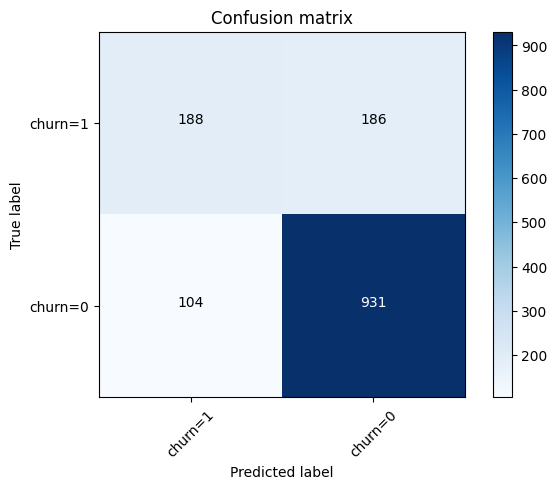

In [133]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [134]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



**log loss**

In [135]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4348969100802401

**Classifying uing ANN**

In [137]:
!pip install tensorflow
!pip install keras

In [138]:
#ANN model with one hidden layer
from keras.models import Sequential
from keras.layers import Dense

In [139]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [141]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',
metrics=['accuracy'])

In [142]:
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
57/57 [==============================] - 2s 2ms/step - loss: 0.5842 - accuracy: 0.7245
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7861
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.7996
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8055
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8064
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8067
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.8071
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8099
Epoch 9/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8122
Epoch 10/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8101
Epoch 11/50
57/57 [

**Model evaluations**

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]
# Accuracy
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train,
in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test,
out_sample_preds))
# Precision
print('In-Sample Precision: %0.4f' % precision_score(y_train,
in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test,out_sample_preds))
# Recall
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test,out_sample_preds))

45/45 [==============================] - 0s 2ms/step
In-Sample Accuracy: 0.8186
Out-of-Sample Accuracy: 0.7850
In-Sample Precision: 0.6884
Out-of-Sample Precision: 0.6099
In-Sample Recall: 0.5779
Out-of-Sample Recall: 0.5267


**Computing the AUC**

In [152]:
from sklearn.metrics import roc_curve, auc
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train,
in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)
print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

45/45 [==============================] - 0s 2ms/step
In-Sample AUC: 0.8697
Out-Sample AUC: 0.8252


**Visualizing the ROC**

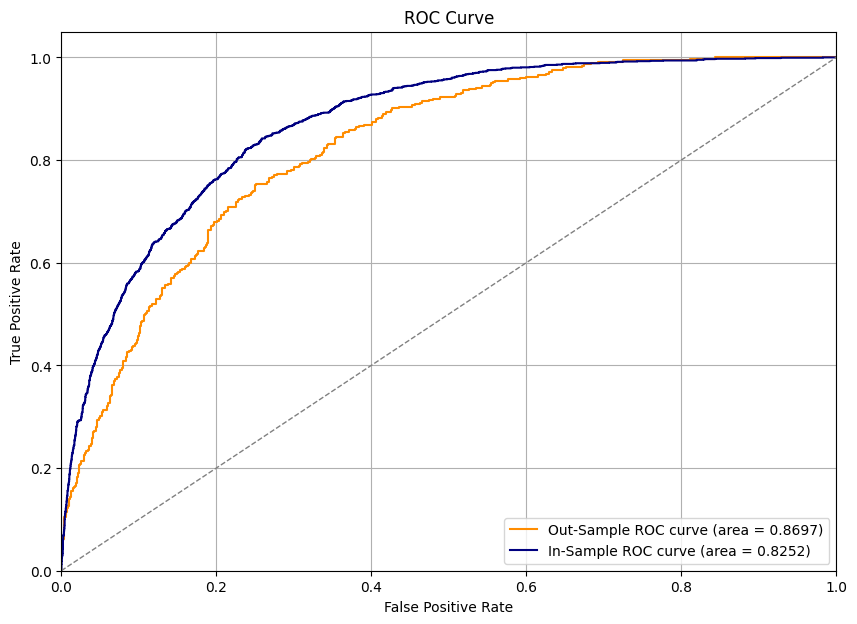

In [162]:
plt.figure(figsize=(10,7))
plt.plot(
out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()